In [5]:
!pip install opencv-python

##  Selective Search를 이용한  Region Proposal

(512, 512, 3)


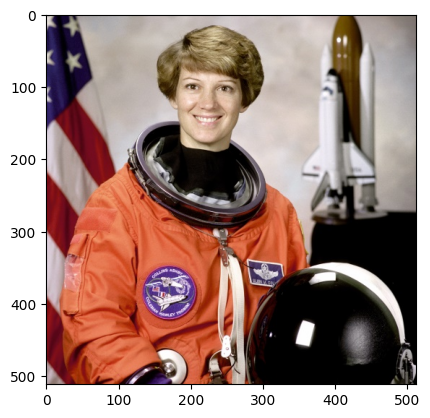

In [1]:
import cv2
import matplotlib.pyplot as plt

### 이미지를 cv2로 로드하고 matplotlib로 시각화
img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

In [11]:
# 캐니 에지검출: Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) 
# https://engineer-mole.tistory.com/243
img = cv2.imread('image.jpg')  # 5125123,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("original_image", gray_img)
edges = cv2.Canny(gray_img,150,250,1) # min,max,aperture_size(=kernel_size)  ,  aperture:구멍
                                       # threshold1, threshold2 가 작을수록 더 조밀하게 검출한다
cv2.imshow("canny_image", edges) 

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
# 윤곽선 검출 : findContours(), drawContours()
# https://bkshin.tistory.com/entry/OpenCV-22-%EC%BB%A8%ED%88%AC%EC%96%B4Contour
# 컨투어(contour)는 등고선을 의미
# 등고선은 지형의 높이가 같은 영역을 하나의 선으로 표시한 것
# 영상에서 컨투어를 그리면 모양을 쉽게 인식할 수 있다
img = cv2.imread('image.jpg')  # 5125123,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh_image = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh_image[1],cv2.RETR_TREE,\
                                       cv2.CHAIN_APPROX_SIMPLE )

cv2.drawContours(img,contours,-1,(255,0,0),2) # (B,G,R):윤곽선색상 ,  2: thickness
cv2.imshow("contour_image",img) 

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
!pip install selectivesearch

In [3]:
import selectivesearch
_,regions = selectivesearch.selective_search(img_rgb,scale=100,min_size=2000)
print(type(regions),len(regions))

# plt.imshow(_)
# plt.show()
# _.dtype



<class 'list'> 58


#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기. 
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음. 
개별 딕셔너리내 KEY값별 의미
rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임. 
size는 Bounding box의 크기
labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐.

In [16]:
regions

[{'rect': (0, 0, 63, 154), 'size': 6540, 'labels': [np.float64(0.0)]},
 {'rect': (26, 0, 217, 226), 'size': 22316, 'labels': [np.float64(1.0)]},
 {'rect': (228, 0, 181, 350), 'size': 27252, 'labels': [np.float64(2.0)]},
 {'rect': (389, 0, 46, 184), 'size': 5238, 'labels': [np.float64(3.0)]},
 {'rect': (419, 0, 92, 283), 'size': 21870, 'labels': [np.float64(4.0)]},
 {'rect': (192, 16, 99, 56), 'size': 3439, 'labels': [np.float64(5.0)]},
 {'rect': (154, 23, 112, 157), 'size': 9159, 'labels': [np.float64(6.0)]},
 {'rect': (234, 45, 65, 84), 'size': 2440, 'labels': [np.float64(7.0)]},
 {'rect': (357, 85, 46, 186), 'size': 4285, 'labels': [np.float64(8.0)]},
 {'rect': (392, 85, 63, 163), 'size': 2623, 'labels': [np.float64(9.0)]},
 {'rect': (186, 87, 106, 102), 'size': 3022, 'labels': [np.float64(10.0)]},
 {'rect': (0, 113, 94, 124), 'size': 4509, 'labels': [np.float64(11.0)]},
 {'rect': (0, 148, 77, 125), 'size': 4570, 'labels': [np.float64(12.0)]},
 {'rect': (133, 154, 162, 110), 'size': 

In [17]:
# rect만 추출
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 63, 154), (26, 0, 217, 226), (228, 0, 181, 350), (389, 0, 46, 184), (419, 0, 92, 283), (192, 16, 99, 56), (154, 23, 112, 157), (234, 45, 65, 84), (357, 85, 46, 186), (392, 85, 63, 163), (186, 87, 106, 102), (0, 113, 94, 124), (0, 148, 77, 125), (133, 154, 162, 110), (113, 155, 273, 209), (57, 203, 87, 128), (0, 219, 59, 126), (365, 231, 146, 253), (107, 248, 194, 187), (36, 254, 91, 121), (0, 303, 125, 156), (350, 322, 145, 133), (27, 329, 98, 90), (239, 334, 35, 177), (263, 336, 248, 175), (280, 345, 202, 139), (116, 368, 96, 88), (0, 394, 90, 117), (155, 423, 104, 88), (43, 426, 192, 85), (27, 254, 100, 165), (116, 368, 143, 143), (0, 254, 127, 205), (154, 23, 138, 166), (107, 248, 194, 263), (154, 16, 138, 173), (0, 203, 144, 256), (107, 248, 194, 263), (43, 248, 258, 263), (0, 113, 94, 232), (357, 85, 98, 186), (0, 203, 301, 308), (263, 336, 248, 175), (263, 231, 248, 280), (113, 85, 342, 279), (0, 0, 243, 273), (154, 16, 145, 173), (0, 0, 299, 273), (0, 0, 301, 511), (113,

### Bounding box를 시각화

### Bounding box 크기를 기준으로 큰 box만 추출

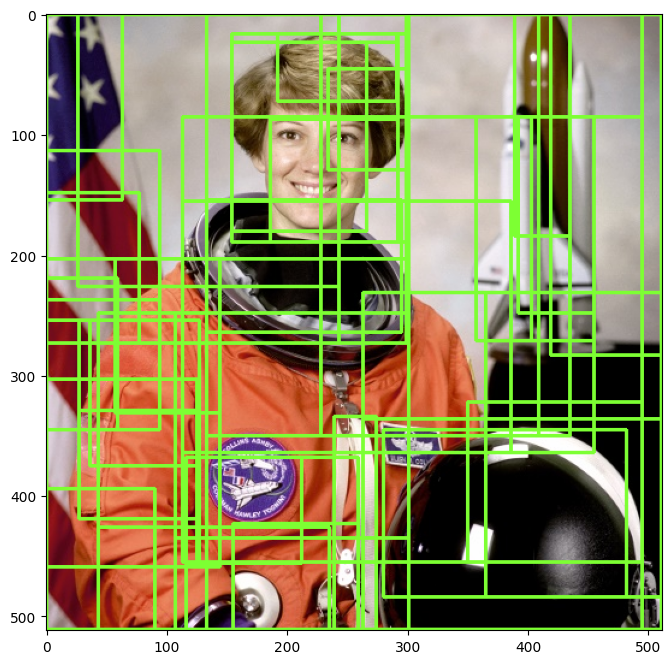

In [19]:
# rect:(x,y,width,height)
green_rgb = (125,255,51)
img_rgb_copy = img_rgb.copy()  # 이미지 사본을 생성
for rect in cand_rects:
    left = rect[0]  # x1
    top = rect[1]   # y1

    right = left + rect[2]  # x2 = x1 + width
    bottom = top + rect[3]  # y2 = y1 + height

    img_rgb_copy = cv2.rectangle(img_rgb_copy,(left,top),(right,bottom),
                                 color=green_rgb,thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()


In [20]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]
print(len(cand_rects)) # 32

32


### IOU : Intersection over Union 구하기
모델이 예측한 결과와 실측(Ground Truth) Box가 얼마나 정확하게 겹치는가를 나타내는 지표 , 1.0이 최대값
IOU가 0.5이면 예측성공으로 인정

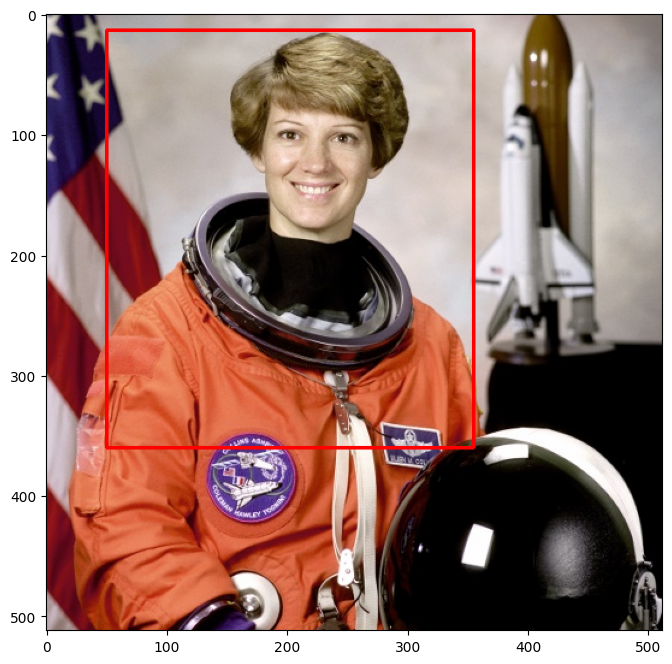

In [11]:
# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정. 

gt_box = [50,13,355,360]  # (x1,y1,x2,y2)

img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255,0,0)
img_rgb = cv2.rectangle(img_rgb,(gt_box[0],gt_box[1]),(gt_box[2],gt_box[3]),
                       color=red,thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()


In [6]:
#### 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [7]:
import numpy as np 

def compute_iou(cand_box,gt_box):
    # intersection areas 계산
    # (x1,y1) : intersection의 좌측 상단 위치
    x1 = np.maximum(cand_box[0],gt_box[0])
    y1 = np.maximum(cand_box[1],gt_box[1])
    
    # (x2,y2)  : intersection의 우측 하단 위치
    x2 = np.minimum(cand_box[2],gt_box[2])
    y2 = np.minimum(cand_box[3],gt_box[3])
    
    # 교집합의 넓이를 구한다
    intersection = np.maximum(x2-x1,0) * np.maximum(y2-y1,0)
    
    cand_box_area = (cand_box[2] - cand_box[0])*(cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0])*(gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection/union
    return iou

In [8]:
# np.maximum() : 두 개의 배열을 취하여 요소 별 최대 값을 구한다
a = np.array([3, 6, 1])
b = np.array([4, 2, 9])
c = np.maximum(a, b)
c

array([4, 6, 9])

In [9]:
_,regions = selectivesearch.selective_search(img_rgb,scale=100,min_size=2000) # scale :대상의 크기
print(type(regions),len(regions))

<class 'list'> 58


In [12]:
cand_rects = [cand['rect'] for cand in regions]  # (x1,y1,width,height)
for index,cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]   # x2 = x1 + width  
    cand_box[3] += cand_box[1]   # y2 = y1 + height  ,  --> (x1,y1,x2,y2)
    
    iou = compute_iou(cand_box,gt_box)
    print('index:',index,'IOU:',iou)

index: 0 IOU: 0.01612080489692535
index: 1 IOU: 0.361340623022291
index: 2 IOU: 0.33863719082809807
index: 3 IOU: 0.0
index: 4 IOU: 0.0
index: 5 IOU: 0.052383427032645154
index: 6 IOU: 0.16614541503283412
index: 7 IOU: 0.051589738744271744
index: 8 IOU: 0.0
index: 9 IOU: 0.0
index: 10 IOU: 0.10215902111777768
index: 11 IOU: 0.04869906725576829
index: 12 IOU: 0.03011107641522059
index: 13 IOU: 0.16837530117635943
index: 14 IOU: 0.43793365230133646
index: 15 IOU: 0.10522039023007512
index: 16 IOU: 0.010112810451687698
index: 17 IOU: 0.0
index: 18 IOU: 0.18048760227603106
index: 19 IOU: 0.07509845055389938
index: 20 IOU: 0.03531306790021477
index: 21 IOU: 0.0015208516769390859
index: 22 IOU: 0.020697943559156058
index: 23 IOU: 0.008189344852411807
index: 24 IOU: 0.015017649819420923
index: 25 IOU: 0.008472151097990783
index: 26 IOU: 0.0
index: 27 IOU: 0.0
index: 28 IOU: 0.0
index: 29 IOU: 0.0
index: 30 IOU: 0.07148800504497561
index: 31 IOU: 0.0
index: 32 IOU: 0.06597794807126459
index: 3

In [13]:
cand_rects = [cand['rect']  for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects


[(0, 0, 63, 154),
 (0, 0, 243, 273),
 (0, 0, 299, 273),
 (0, 0, 301, 511),
 (0, 0, 301, 511),
 (0, 0, 495, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 113, 94, 232),
 (0, 203, 144, 256),
 (0, 203, 301, 308),
 (0, 254, 127, 205),
 (0, 303, 125, 156),
 (26, 0, 217, 226),
 (27, 254, 100, 165),
 (27, 329, 98, 90),
 (36, 254, 91, 121),
 (43, 248, 258, 263),
 (43, 426, 192, 85),
 (107, 248, 194, 187),
 (107, 248, 194, 263),
 (107, 248, 194, 263),
 (113, 85, 342, 279),
 (113, 85, 382, 370),
 (113, 155, 273, 209),
 (116, 368, 143, 143),
 (133, 0, 302, 350),
 (133, 0, 378, 511),
 (133, 154, 162, 110),
 (154, 16, 138, 173),
 (154, 16, 145, 173),
 (154, 23, 112, 157),
 (154, 23, 138, 166),
 (228, 0, 181, 350),
 (228, 0, 207, 350),
 (239, 334, 35, 177),
 (263, 231, 248, 280),
 (263, 336, 248, 175),
 (263, 336, 248, 175),
 (280, 345, 202, 139),
 (357, 85, 98, 186),
 (365, 231, 146, 253),
 (389, 0, 46, 184),
 (419, 0, 92, 283)]

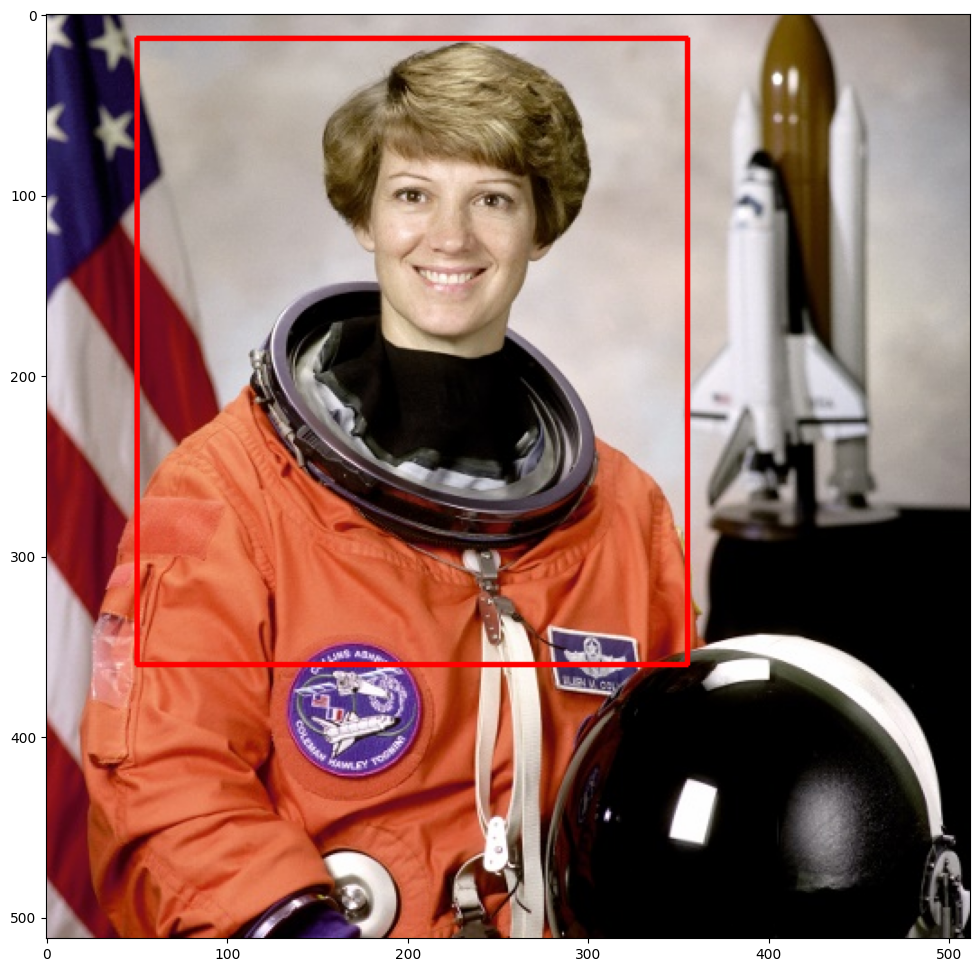

In [14]:
# IOU > 0.5 , size > 3000 인 box만 출력하기
img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gt_box = [50,13,355,360]  # (x1,y1,x2,y2)

green_rgb = (125,255,51)

cand_rects = [cand['rect']  for cand in regions if cand['size'] > 3000]

red = (255,0,0)
img_rgb = cv2.rectangle(img_rgb,(gt_box[0],gt_box[1]),(gt_box[2],gt_box[3]),
                       color=red,thickness=2)

for index,cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]   # x2 = x1 + width  
    cand_box[3] += cand_box[1]   # y2 = y1 + height  ,  --> (x1,y1,x2,y2)
    
    iou = compute_iou(cand_box,gt_box)
    
    if iou > 0.9:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()